In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("diamonds_new.csv")

In [5]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [6]:
data.shape

(53940, 9)

In [7]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


# Handling missing values

In [9]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [10]:
data["color"]

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: object

In [11]:
data["color"].value_counts()

G    11236
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [12]:
data['color'] = data['color'].fillna('G')

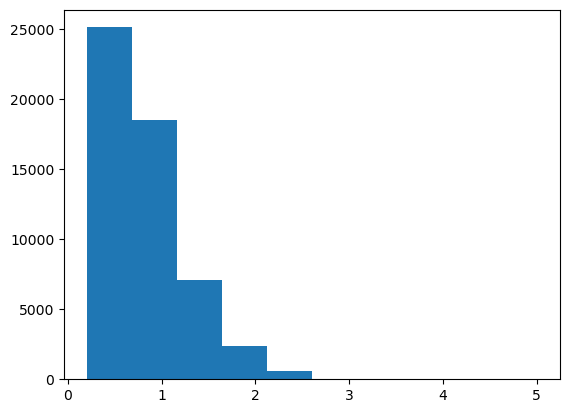

In [13]:
plt.hist(data['carat'])
plt.show()

In [14]:
median_carat = data['carat'].median()

In [15]:
data['carat'] = data['carat'].fillna(median_carat)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [17]:
data.isna().sum()

carat         0
cut           0
color         0
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

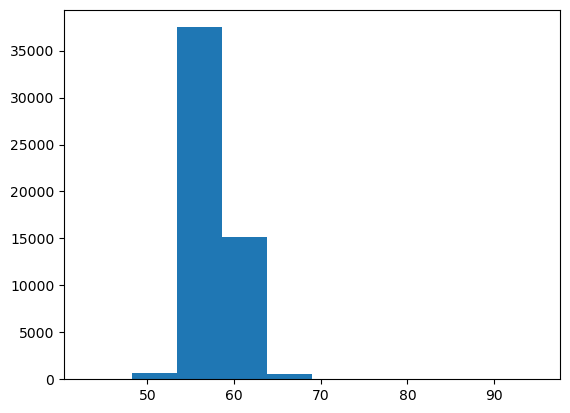

In [18]:
plt.hist(data['table'])
plt.show

In [19]:
median_table = data['table'].median()

In [20]:
data['table'] = data['table'].fillna(median_table)

In [21]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53940 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


# Outliers detection

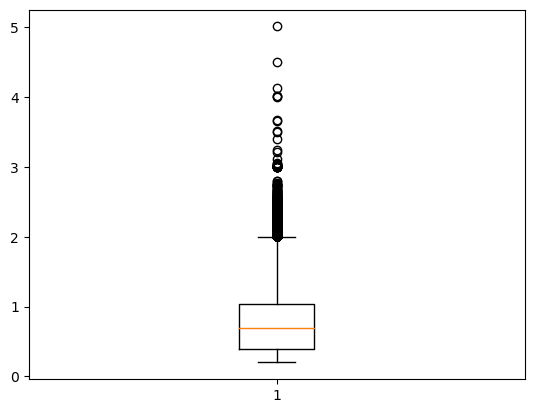

In [23]:
plt.boxplot(data['carat'])
plt.show()

In [45]:
import scipy.stats as stats

In [46]:
data['zr'] = stats.zscore(data['carat'])

In [47]:
data[(data['zr'] < -3) | (data['zr']> 3)].index 

Int64Index([13757, 14138, 15684, 16283, 16439, 16637, 17181, 17196, 17466,
            17560,
            ...
            27679, 27681, 27684, 27685, 27726, 27727, 27731, 27739, 27744,
            27749],
           dtype='int64', length=439)

In [48]:
data[(data['zr'] > -3) & (data['zr'] < 3)] 

,carat,cut,color,clarity,table,x,y,z,price_new,zr
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0,-1.198168
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0,-1.240361
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5,-1.198168
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0,-1.071587
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5,-1.029394
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5,-0.164427
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5,-0.164427
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5,-0.206621
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5,0.130927


In [ ]:
#data = data.drop([13757, 14138, 15684, 16283, 16439, 16637, 17181, 17196, 17466,
#            17560,
#           ...
#           27679, 27681, 27684, 27685, 27726, 27727, 27731, 27739, 27744,
#           27749])

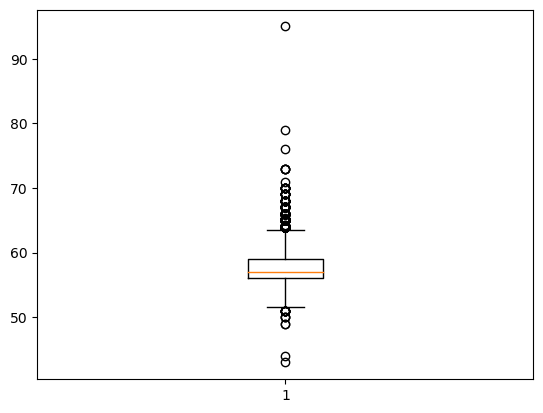

In [28]:
plt.boxplot(data['table'])
plt.show()

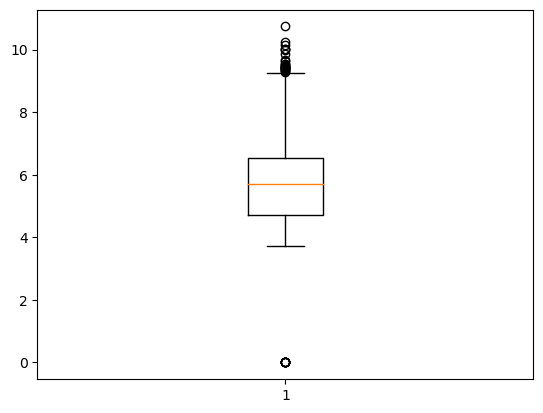

In [29]:
plt.boxplot(data['x'])
plt.show()

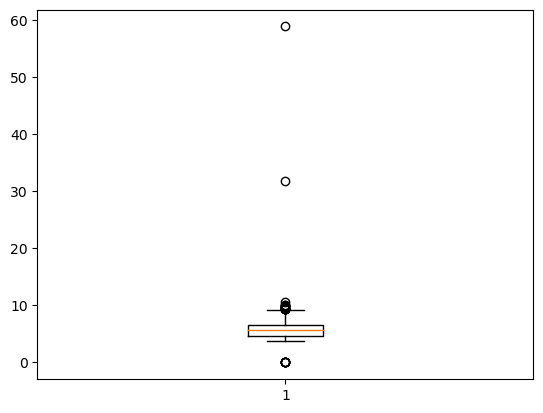

In [30]:
plt.boxplot(data['y'])
plt.show()

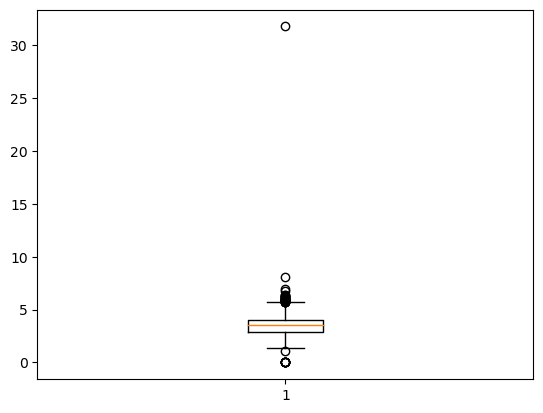

In [31]:
plt.boxplot(data['z'])
plt.show()

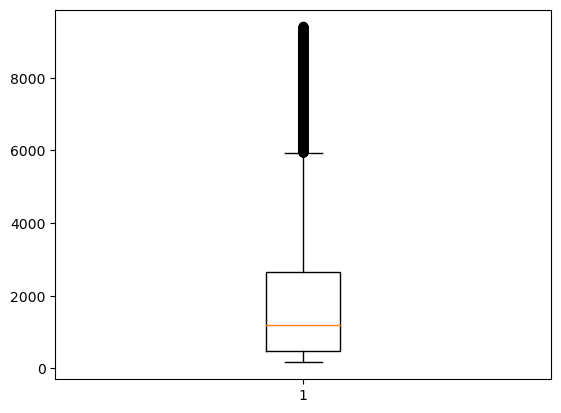

In [32]:
plt.boxplot(data['price_new'])
plt.show()

# Scaling

In [44]:
data.describe()

,carat,table,x,y,z,price_new,zr
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,5.394000e+04
mean,0.797940,57.457184,5.731157,5.734526,3.539635,1966.399861,2.444878e-16
std,0.474011,2.234491,1.121761,1.142135,0.703869,1994.719869,1.000009e+00
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000,-1.261458e+00
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000,-8.395232e-01
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000,-2.066210e-01
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000,5.106683e-01
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000,8.886075e+00


In [34]:
from sklearn import preprocessing

In [49]:
avr_rate = data['carat'].mean()
std_rate = data['carat'].std()

In [51]:
data['z_score_rate'] = (data['carat'] - avr_rate) / std_rate

In [52]:
data

,carat,cut,color,clarity,table,x,y,z,price_new,zr,z_score_rate
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0,-1.198168,-1.198157
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0,-1.240361,-1.240350
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5,-1.198168,-1.198157
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0,-1.071587,-1.071577
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5,-1.029394,-1.029384
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5,-0.164427,-0.164426
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5,-0.164427,-0.164426
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5,-0.206621,-0.206619
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5,0.130927,0.130926


In [53]:
type(data)

pandas.core.frame.DataFrame

In [59]:
data.shape

(53940, 11)

# Encoding

In [60]:
data.cut.nunique()

5

In [61]:
data.color.nunique()

7

In [62]:
data = pd.get_dummies(data)

In [63]:
data

,carat,table,x,y,z,price_new,zr,z_score_rate,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,3.95,3.98,2.43,163.0,-1.198168,-1.198157,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,3.89,3.84,2.31,163.0,-1.240361,-1.240350,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,65.0,4.05,4.07,2.31,163.5,-1.198168,-1.198157,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,58.0,4.20,4.23,2.63,167.0,-1.071587,-1.071577,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,4.34,4.35,2.75,167.5,-1.029394,-1.029384,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,57.0,5.75,5.76,3.50,1378.5,-0.164427,-0.164426,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,55.0,5.69,5.75,3.61,1378.5,-0.164427,-0.164426,0,1,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,60.0,5.66,5.68,3.56,1378.5,-0.206621,-0.206619,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,58.0,6.15,6.12,3.74,1378.5,0.130927,0.130926,0,0,...,0,0,0,0,0,1,0,0,0,0


# Scaling

In [64]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

We can also give training and validation 

In [65]:
data = min_max.fit_transform(data)

In [69]:
data = pd.DataFrame(data)

In [70]:
type(data)

pandas.core.frame.DataFrame

In [72]:
data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.006237,0.230769,0.367784,0.067572,0.076415,0.000000,0.006237,0.006237,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.002079,0.346154,0.362197,0.065195,0.072642,0.000000,0.002079,0.002079,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.006237,0.423077,0.377095,0.069100,0.072642,0.000054,0.006237,0.006237,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.018711,0.288462,0.391061,0.071817,0.082704,0.000433,0.018711,0.018711,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.022869,0.288462,0.404097,0.073854,0.086478,0.000487,0.022869,0.022869,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.108108,0.269231,0.535382,0.097793,0.110063,0.131427,0.108108,0.108108,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.108108,0.230769,0.529795,0.097623,0.113522,0.131427,0.108108,0.108108,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.103950,0.326923,0.527002,0.096435,0.111950,0.131427,0.103950,0.103950,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.137214,0.288462,0.572626,0.103905,0.117610,0.131427,0.137214,0.137214,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
